In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Resources/car_prices.csv")

In [3]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [5]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [6]:
features = ['year', 'odometer', 'mmr', 'condition', 'color', 'interior', 'transmission', 'sellingprice']

In [7]:
df.dropna(subset=features, inplace=True)

In [8]:
df = pd.get_dummies(df, columns=['condition', 'color', 'interior', 'transmission'])

In [9]:
df.head()

,year,make,model,trim,body,vin,state,odometer,seller,mmr,...,interior_orange,interior_purple,interior_red,interior_silver,interior_tan,interior_white,interior_yellow,interior_—,transmission_automatic,transmission_manual
0,2015,Kia,Sorento,LX,SUV,5xyktca69fg566472,ca,16639.0,kia motors america inc,20500.0,...,False,False,False,False,False,False,False,False,True,False
1,2015,Kia,Sorento,LX,SUV,5xyktca69fg561319,ca,9393.0,kia motors america inc,20800.0,...,False,False,False,False,False,False,False,False,True,False
2,2014,BMW,3 Series,328i SULEV,Sedan,wba3c1c51ek116351,ca,1331.0,financial services remarketing (lease),31900.0,...,False,False,False,False,False,False,False,False,True,False
3,2015,Volvo,S60,T5,Sedan,yv1612tb4f1310987,ca,14282.0,volvo na rep/world omni,27500.0,...,False,False,False,False,False,False,False,False,True,False
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,wba6b2c57ed129731,ca,2641.0,financial services remarketing (lease),66000.0,...,False,False,False,False,False,False,False,False,True,False


In [10]:
X = df.drop(['sellingprice', 'make', 'model', 'trim', 'body', 'vin', 'state', 'seller', 'saledate'], axis=1)
y = df['sellingprice']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
k = 5
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [14]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7363967.271426531


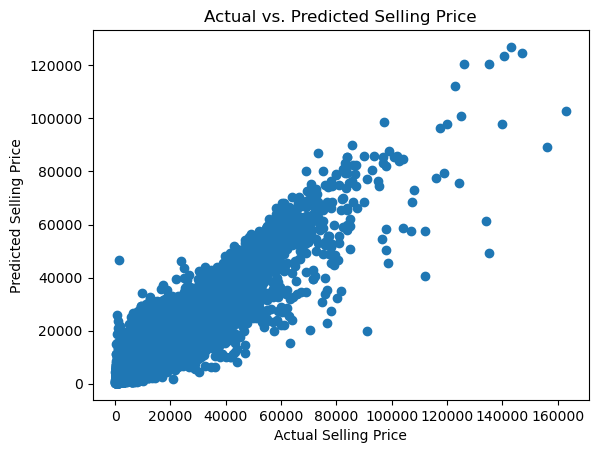

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Price')
plt.show()

sales_month
2     163053
1     140815
6      99937
12     53520
5      52447
3      46277
4       1450
7       1300
Name: count, dtype: int64